In [2]:
import numpy as np

def Matrx():
    a=[]
    for i in range(5):
        b=[]
        for j in range(6):
            b.append(j)
        a.append(b)
    return a

def Matrx1():
    a=[]
    for i in range(5):
        b=[]
        for j in range(6):
            b.append(j)
        a.append(b)
    return a

m1 = np.array(Matrx())
print(m1)
m2 = np.array(Matrx1())
print(m2)

print(np.array_equal(m1,m2))


[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
True


In [3]:
a=[[(1,3,5,6),
    (4,3,5,6),
    (2,3,5,6)],
    [(3,3,5,6),
    (4,3,5,6),
    (2,3,5,6)],
    [(1,3,5,6),
    (4,3,5,6),
    (2,3,5,6)]]
print(a)
def castx(x):
    return x[0]

for i in range(len(a)):
    a[i].sort(key=castx) 
print(a)

[[(1, 3, 5, 6), (4, 3, 5, 6), (2, 3, 5, 6)], [(3, 3, 5, 6), (4, 3, 5, 6), (2, 3, 5, 6)], [(1, 3, 5, 6), (4, 3, 5, 6), (2, 3, 5, 6)]]
[[(1, 3, 5, 6), (2, 3, 5, 6), (4, 3, 5, 6)], [(2, 3, 5, 6), (3, 3, 5, 6), (4, 3, 5, 6)], [(1, 3, 5, 6), (2, 3, 5, 6), (4, 3, 5, 6)]]


In [4]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression

# Reading the template
temp = cv2.imread('C:/Users/S_G/Documents/GitHub/Shape_Detection/data/3.jpeg', cv2.IMREAD_COLOR)

In [5]:
print(temp.shape)
# temp=cv2.resize(temp, (640, 480), interpolation = cv2.INTER_NEAREST)


(1512, 2016, 3)


In [6]:
def crop(image, mask_pts):
    #imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    pts = np.array(mask_pts)
    color = 255
    cv2.fillPoly(mask, [pts], color)
    masked = cv2.bitwise_and(image, image, mask=mask)
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = image[y:y+h, x:x+w].copy()
    print(croped.shape , image.shape)
    return croped, image

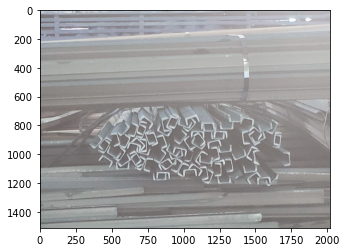

In [7]:
import matplotlib.pyplot as plt
plt.imshow(temp)

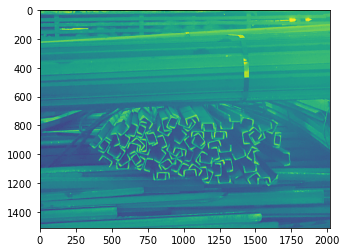

In [8]:
image= cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
# ret, thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh1=image
plt.imshow(thresh1)

(651, 1511) (1512, 2016)


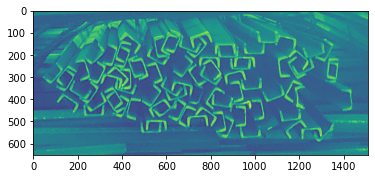

In [9]:
mask_pts = [[310,630], [1810,630], [1810,1280], [300,1280]]

croped, original = crop(thresh1, mask_pts)


plt.imshow(croped)

(106, 56) (651, 1511)
shape: (651, 1511)


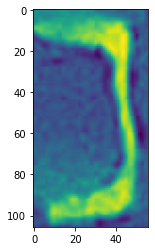

In [10]:
mask_pts1 = [[1390,350], [1445,350], [1445,455], [1390,455]]

croped1, original1 = crop(croped, mask_pts1)
print("shape:", croped.shape)
plt.imshow(croped1)

In [11]:
# temp = cv2.imread("./data/temp.png")
# print(temp.shape)
# image = cv2.imread("./data/3.jpeg")

In [12]:
a=[1,2,4]
b=[4,5,6]
l=zip(a,b)
print((1,4) in l)

True


In [13]:
def new_img(img,result,thresh):
    (y_points, x_points) = np.where(result >= thresh)
    loc = zip(x_points, y_points)
    # print(loc[0])
    result1 = img.copy()
    W, H = img.shape
    cnt1, cnt2 = 0,0
    for x in range (W):
        for y in range (H):
            cnt1 += 1
            if (x,y) not in loc:
                result1[x][y] = 0
            else: cnt2 += 1
            # print(x,y)
    print(cnt1,cnt2)
    return result1


3048192 0
1512


True

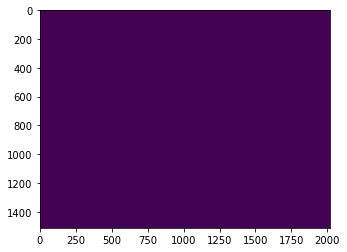

In [28]:
# result = cv2.matchTemplate(image=croped, templ=croped1,method=cv2.TM_CCOEFF_NORMED)
croped=original
result= cv2.matchTemplate(croped, croped1, cv2.TM_SQDIFF_NORMED, None)
    
threshold = 0.2
 
# # Store the coordinates of matched area in a numpy array
# loc = np.where(result >= threshold)
# print(loc,loc[0])

result1 = new_img(croped,result,threshold)

print(len(result1))
plt.imshow(result1*256)
cv2.imwrite('result1_1.png',result1*255)

(1407, 1961) (1512, 2016)
(1407, 1961) (1407, 1961)


True

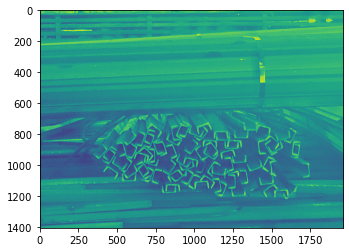

In [15]:
h,w = croped1.shape
# h,w = h-1,w-1
y,x = croped.shape
mask_pts = [[0,0], [x-w,0], [x-w,y-h], [0,y-h]]

croped_n, original = crop(croped, mask_pts)
print(croped_n.shape, result.shape)
min_res = croped_n - result*255
plt.imshow(min_res)
cv2.imwrite('min_result1.png',min_res)

True

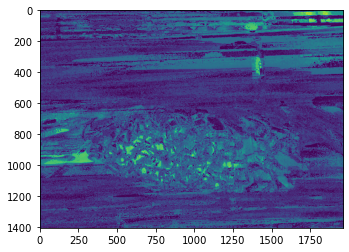

In [16]:
bitwise_and = cv2.bitwise_and(np.array(croped_n).astype(int), np.array(result*256).astype(int))
plt.imshow(bitwise_and)
cv2.imwrite('bitwise_and_1.png', bitwise_and)

True

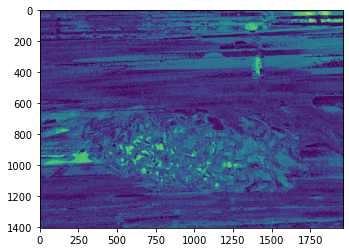

In [17]:
img = cv2.imread("./bitwise_and_1.png",0)
# ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(croped, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img)
cv2.imwrite('bitwise_and_cntr.png', img)

True

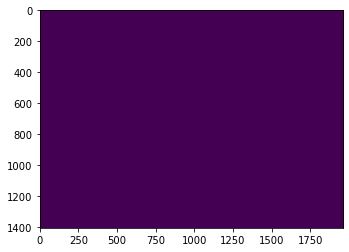

In [18]:
img = cv2.imread("./bitwise_and_1.png",0)
edges = cv2.Canny(img,200,300)
plt.imshow(edges)
cv2.imwrite('edges_1.png', edges)

In [19]:
(y_points, x_points) = np.where(result >= 0.8)


In [20]:
print(len(y_points), x_points)

0 []


In [21]:
cv2.normalize( result, result, 0, 1, cv2.NORM_MINMAX, -1 )
    
_minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)

matchLoc = minLoc

In [22]:
print(len(result[0]), result[0])

1961 [0.3281107  0.32697478 0.32622808 ... 0.60831267 0.608408   0.6084704 ]


In [23]:
threshold = 0.06
loc = np.where( result <= threshold)
# print(len(loc[0]))
templ= croped1
w,h = templ.shape[0], templ.shape[1]
# for pt in zip(*loc[::-1]):
for pt in result:
    # pt = np.array(pt[0])
    print(pt)
    print(np.amin(pt), np.amax(pt), np.mean(pt))
    # _minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(pt, None)
    matchLoc = maxLoc
    cv2.rectangle(original, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (50,250,50), 2, 8, 0 )
cv2.imwrite('res.png',original)

[0.3281107  0.32697478 0.32622808 ... 0.60831267 0.608408   0.6084704 ]
0.28946924 0.9228904 0.43605873
[0.3161467  0.31502742 0.31431812 ... 0.6085645  0.60856915 0.608478  ]
0.28470355 0.9211578 0.431853
[0.30505836 0.30396977 0.30329615 ... 0.60840535 0.6083214  0.6080914 ]
0.2812009 0.92026085 0.4282792
[0.29504192 0.29399773 0.2933403  ... 0.60820156 0.6080389  0.60771054]
0.27859896 0.92104036 0.4256079
[0.28631812 0.28531858 0.28465968 ... 0.6079699  0.6077505  0.6073447 ]
0.2766525 0.9242265 0.42372814
[0.2789395  0.2779814  0.2772942  ... 0.6078211  0.60754746 0.60709757]
0.27237588 0.93049586 0.42241016
[0.27294666 0.27201536 0.27127233 ... 0.6081086  0.6077696  0.6072795 ]
0.26606768 0.93953055 0.42168215
[0.26875573 0.26779038 0.26691797 ... 0.60854745 0.6081648  0.6076533 ]
0.26080728 0.94999015 0.4214583
[0.2655327  0.2644702  0.26342684 ... 0.6090713  0.6086589  0.6081583 ]
0.25716716 0.96002793 0.42161107
[0.26321775 0.26201582 0.2608108  ... 0.6094767  0.60907125 0.608

True

True

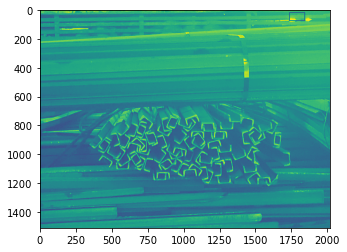

In [24]:
image_window = "Source Image"
result_window = "Result window"
templ= croped1
cv2.rectangle(original, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (50,250,50), 2, 8, 0 )
cv2.rectangle(result, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (50,50,50), 2, 8, 0 )
plt.imshow(original)
cv2.imwrite("./original_min.png", original)


True

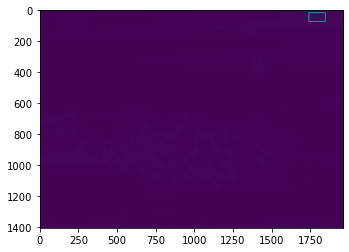

In [25]:
plt.imshow(result)
cv2.imwrite("./oresult_min.png", result)

In [26]:
a=np.array([[1,5,6],[2,6,4]])
(b, c) = np.where(a >= 4)


In [27]:
print(b,c)

[0 0 1 1] [1 2 1 2]
